#### 0. Persiapan

In [38]:
# persiapan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [39]:
# menggabungkan dataset

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_dunia = pd.read_json(covid_url)
df_covid_dunia = df_covid_dunia.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_negara = pd.read_json(countries_url)

df_covid = pd.merge(df_covid_dunia.reset_index(), df_negara, on="geo_id").set_index("date")

#### 1. Pre-processing Data

In [40]:
# melihat gambaran data

print(df_covid.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   

           geo_id country_name  
date                            
2019-12-31     IN        India  
2020-01-01     IN        India  
2020-01-02     IN        India  
2020-01-03     IN        India  
2020-01-04     IN        India  


In [41]:
# melihat info data

print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61625 entries, 2019-12-31 to 2020-12-14
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61625 non-null  int64 
 1   daily_deaths           61625 non-null  int64 
 2   confirmed_cases        61625 non-null  int64 
 3   deaths                 61625 non-null  int64 
 4   geo_id                 61625 non-null  object
 5   country_name           61625 non-null  object
dtypes: int64(4), object(2)
memory usage: 3.3+ MB
None


In [42]:
# cek nilai yang hilang (kosong)

round(100*(df_covid.isnull().sum()/len(df_covid.index)), 2).sort_values(ascending=False)

daily_confirmed_cases    0.0
daily_deaths             0.0
confirmed_cases          0.0
deaths                   0.0
geo_id                   0.0
country_name             0.0
dtype: float64

#### 2. Filter 4 Negara

In [43]:
# membuat data dan melihat hasil

df_usa = df_covid[df_covid['country_name']=='United_States_of_America']
df_usa = df_usa.drop(columns=['daily_confirmed_cases','daily_deaths','deaths','geo_id', 'country_name']).sort_values(by="date")
print('Data USA :\n', df_usa.head())

df_canada = df_covid[df_covid['country_name']=='Canada']
df_canada = df_canada.drop(columns=['daily_confirmed_cases','daily_deaths','deaths','geo_id', 'country_name']).sort_values(by="date")
print('Data USA :\n', df_canada.head())

df_chile = df_covid[df_covid['country_name']=='Chile']
df_chile = df_chile.drop(columns=['daily_confirmed_cases','daily_deaths','deaths','geo_id', 'country_name']).sort_values(by="date")
print('Data USA :\n', df_chile.head())

df_australia = df_covid[df_covid['country_name']=='Australia']
df_australia = df_australia.drop(columns=['daily_confirmed_cases','daily_deaths','deaths','geo_id', 'country_name']).sort_values(by="date")
print('Data USA :\n', df_australia.head())

Data USA :
             confirmed_cases
date                       
2019-12-31                0
2020-01-01                0
2020-01-02                0
2020-01-03                0
2020-01-04                0
Data USA :
             confirmed_cases
date                       
2019-12-31                0
2020-01-01                0
2020-01-02                0
2020-01-03                0
2020-01-04                0
Data USA :
             confirmed_cases
date                       
2020-03-04                1
2020-03-05                3
2020-03-06                4
2020-03-07                5
2020-03-09               10
Data USA :
             confirmed_cases
date                       
2019-12-31                0
2020-01-01                0
2020-01-02                0
2020-01-03                0
2020-01-04                0


In [44]:
# filter tanggal

a = df_usa.loc['2020-03-16':'2020-12-02']
print('Data USA :\n', a.head())

b = df_canada.loc['2020-03-16':'2020-12-02']
print('Data Canada :\n', b.head())

c = df_chile.loc['2020-03-16':'2020-12-02']
print('Data Chile :\n', c.head())

d = df_australia.loc['2020-03-16':'2020-12-02']
print('Data Australia :\n', d.head())

Data USA :
             confirmed_cases
date                       
2020-03-16             3774
2020-03-17             4661
2020-03-18             6427
2020-03-19             9415
2020-03-20            14250
Data Canada :
             confirmed_cases
date                       
2020-03-16              304
2020-03-17              424
2020-03-18              569
2020-03-19              690
2020-03-20              846
Data Chile :
             confirmed_cases
date                       
2020-03-16               75
2020-03-17              156
2020-03-18              201
2020-03-19              238
2020-03-20              342
Data Australia :
             confirmed_cases
date                       
2020-03-16              298
2020-03-17              375
2020-03-18              454
2020-03-19              565
2020-03-20              709


#### 3. Visualisasi

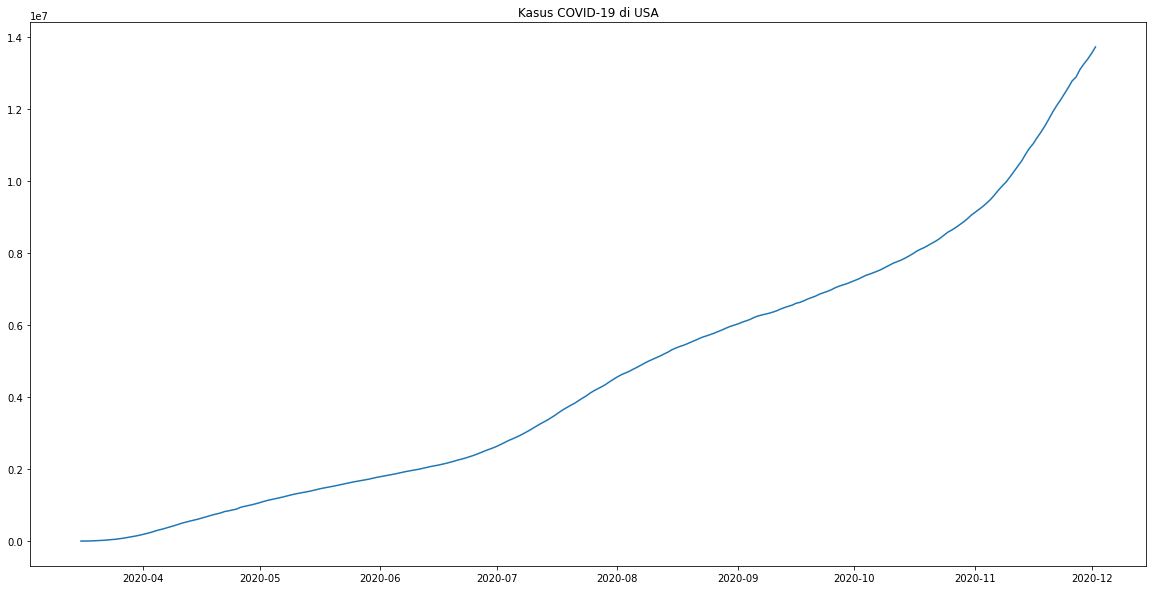

In [45]:
# membuat grafik usa

plt.figure(figsize=(20,10))
plt.plot(a['confirmed_cases'])
plt.title("Kasus COVID-19 di USA")
plt.show();

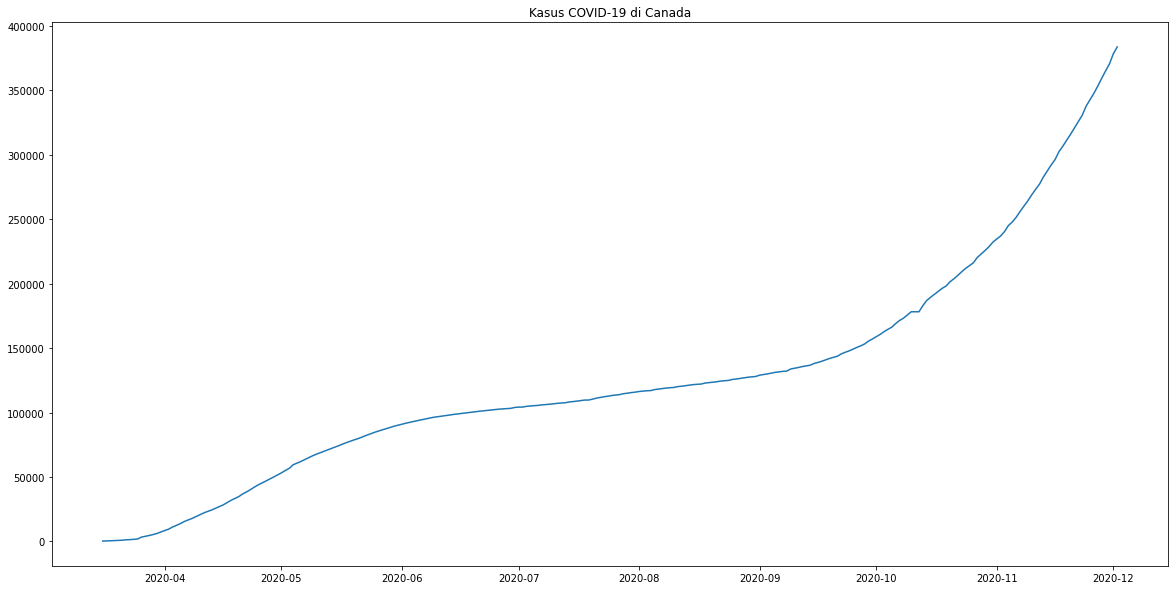

In [46]:
# membuat grafik canada

plt.figure(figsize=(20,10))
plt.plot(b['confirmed_cases'])
plt.title("Kasus COVID-19 di Canada")
plt.show();

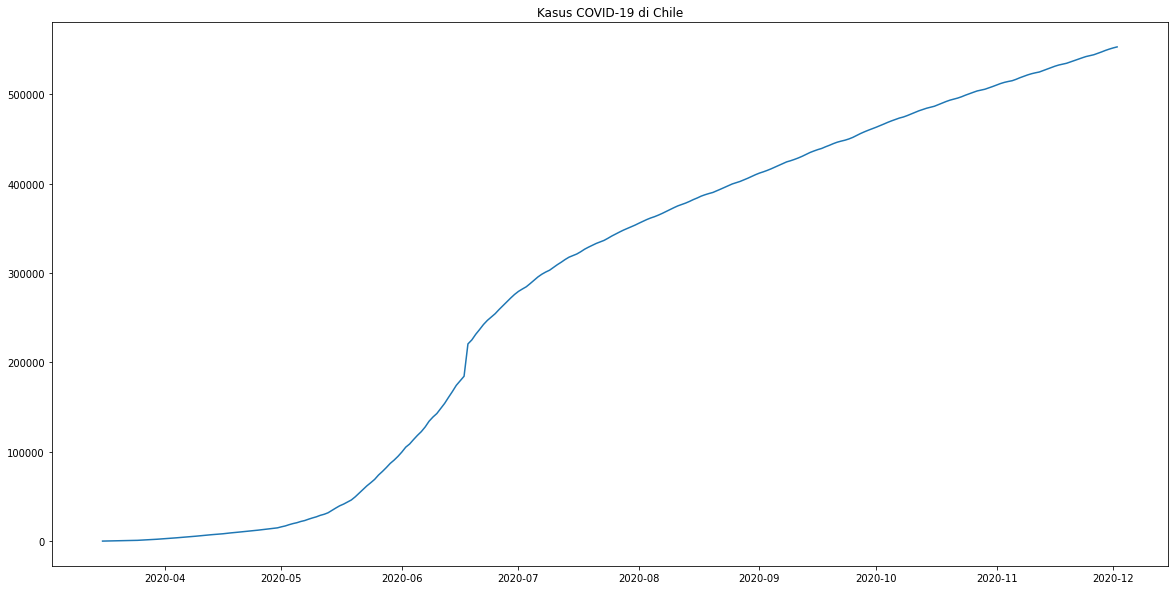

In [47]:
# membuat grafik chile

plt.figure(figsize=(20,10))
plt.plot(c['confirmed_cases'])
plt.title("Kasus COVID-19 di Chile")
plt.show();

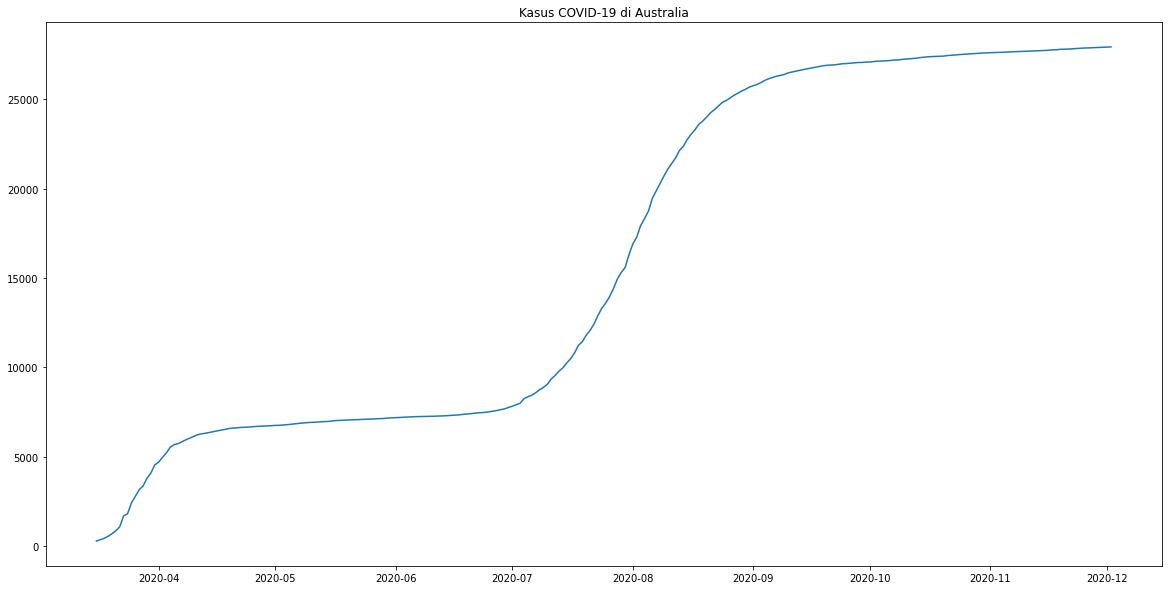

In [48]:
# membuat grafik australia

plt.figure(figsize=(20,10))
plt.plot(d['confirmed_cases'])
plt.title("Kasus COVID-19 di Australia")
plt.show();